# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.


In [122]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [123]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 25
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1


   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews
Scraping page 21
   ---> 2100 total reviews
Scraping page 22
   ---> 2200 total reviews
Scraping page 23
   ---> 2300 total reviews
Scraping page 24
   --

In [124]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,"✅ Trip Verified | BA First, it's not even the..."
1,✅ Trip Verified | The worst business class ex...
2,Not Verified | Quite possibly the worst busin...
3,Not Verified | I will never be flying with BA...
4,✅ Trip Verified | On the my trip to Mexico Ci...


In [125]:
df.to_csv("data/BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.


In [126]:
df = pd.read_csv("data/BA_reviews.csv", index_col=0)

In [127]:
df

,reviews
0,"✅ Trip Verified | BA First, it's not even the..."
1,✅ Trip Verified | The worst business class ex...
2,Not Verified | Quite possibly the worst busin...
3,Not Verified | I will never be flying with BA...
4,✅ Trip Verified | On the my trip to Mexico Ci...
...,...
2495,Vancouver to Dar-es-salaam via London / Doha. ...
2496,Have been impressed with British Airways in th...
2497,Outbound British Airways flight from London to...
2498,"Gatwick to Male, and just when we thought the ..."


In [128]:
df.isnull().value_counts()

reviews
False      2500
Name: count, dtype: int64

In [129]:
df["verified"] = df["reviews"].str.contains("Trip Verified")

In [130]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

stopwords = set(stopwords.words('english'))
special_chars = re.compile(r'[^\w\s]', re.I|re.A)
lem = WordNetLemmatizer()

reviews_data = df["reviews"].str.replace("Trip Verified", " ") # Remove the "Trip Verified" text
reviews_data = reviews_data.str.replace("Not Verified", " ") #  Remove the "Not Verified" text

corpus = []

for text in reviews_data:
    text = special_chars.sub('', text).lower()
    text = re.sub('https?://\S+|www\.\S+', '', text)
    words = nltk.word_tokenize(text)

    words = [word for word in words if word not in stopwords]

    words = [lem.lemmatize(word) for word in words]
    
    text = " ".join(words)
    corpus.append(text)

In [131]:
# df  = df.drop('corpus', axis=1)

In [132]:
df["corpus"] = corpus

In [133]:
df

,reviews,verified,corpus
0,"✅ Trip Verified | BA First, it's not even the...",True,ba first even best business class sky cabin lo...
1,✅ Trip Verified | The worst business class ex...,True,worst business class experience ground crew si...
2,Not Verified | Quite possibly the worst busin...,False,quite possibly worst business class ever flown...
3,Not Verified | I will never be flying with BA...,False,never flying ba first last flying singapore tr...
4,✅ Trip Verified | On the my trip to Mexico Ci...,True,trip mexico city opportunity experience ba lon...
...,...,...,...
2495,Vancouver to Dar-es-salaam via London / Doha. ...,False,vancouver daressalaam via london doha yet anot...
2496,Have been impressed with British Airways in th...,False,impressed british airway past today different ...
2497,Outbound British Airways flight from London to...,False,outbound british airway flight london rio de j...
2498,"Gatwick to Male, and just when we thought the ...",False,gatwick male thought british airway business c...


In [134]:
df.shape

(2500, 3)

In [135]:
df["verified"].value_counts()


verified
False    1301
True     1199
Name: count, dtype: int64

In [136]:
from collections import Counter

# Split each sentence in 'corpus' into words and count the frequency of each word
word_freq = Counter(word for sentence in corpus for word in sentence.split())

# Print the frequency of each word in descending order
for word, freq in word_freq.most_common():
    print(f'{word}: {freq}')

flight: 5560
ba: 3405
seat: 2792
service: 2104
london: 1818
time: 1682
british: 1541
airway: 1539
food: 1494
crew: 1437
airline: 1370
hour: 1361
class: 1343
cabin: 1296
good: 1250
one: 1197
heathrow: 1157
business: 1130
staff: 1073
would: 1070
get: 1001
economy: 955
review: 898
passenger: 893
u: 864
first: 837
meal: 792
drink: 784
customer: 781
plane: 776
verified: 776
back: 739
even: 738
boarding: 728
lounge: 721
could: 707
bag: 689
experience: 670
check: 659
day: 658
return: 648
club: 620
told: 613
fly: 604
airport: 584
new: 573
minute: 570
aircraft: 565
like: 539
premium: 497
well: 490
year: 487
also: 475
really: 471
got: 469
2: 464
long: 462
luggage: 461
two: 461
flying: 450
offered: 449
way: 447
better: 445
another: 437
made: 431
poor: 429
choice: 428
still: 420
much: 416
served: 412
ticket: 410
due: 408
last: 407
arrived: 406
board: 404
leg: 402
take: 402
make: 401
next: 397
never: 392
booked: 386
3: 386
friendly: 385
late: 385
full: 385
people: 384
flew: 384
great: 383
gate: 382

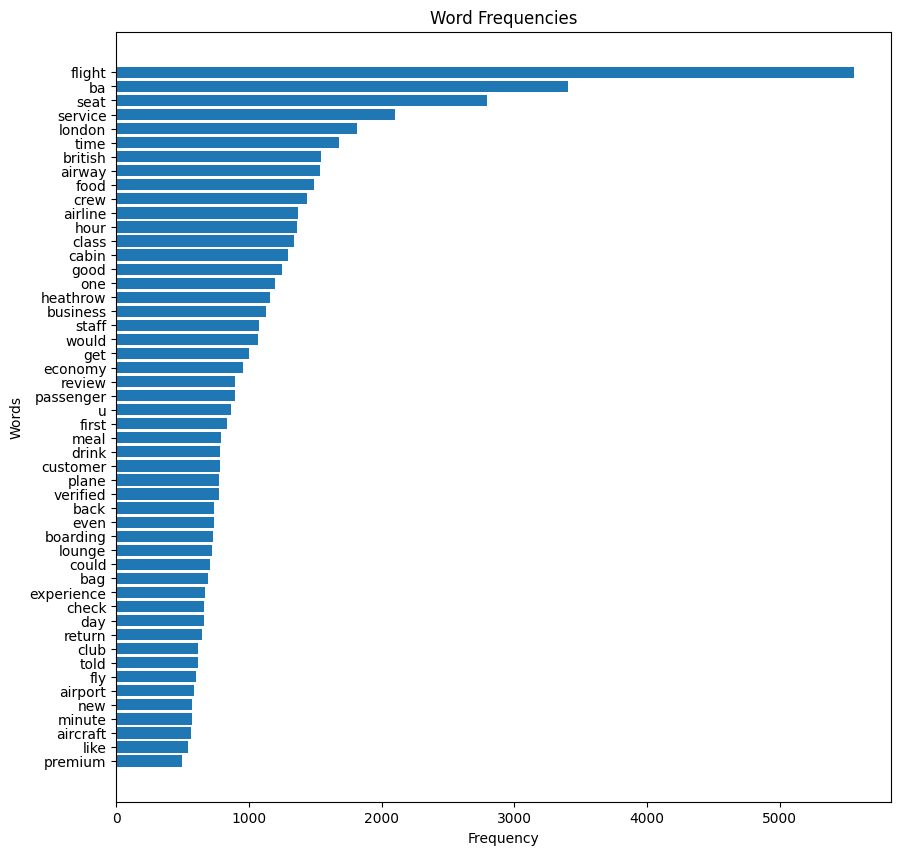

In [137]:
import matplotlib.pyplot as plt

# Get the 10 most common words
common_words = word_freq.most_common(50)

# Unzip the word-frequency pairs into two lists
words, frequencies = zip(*common_words)

# Create a horizontal bar chart
plt.figure(figsize=(10, 10))
plt.barh(words, frequencies)
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Word Frequencies')
plt.gca().invert_yaxis()  # Invert the y-axis to show the highest frequency at the top
plt.show()

(-0.5, 399.5, 399.5, -0.5)

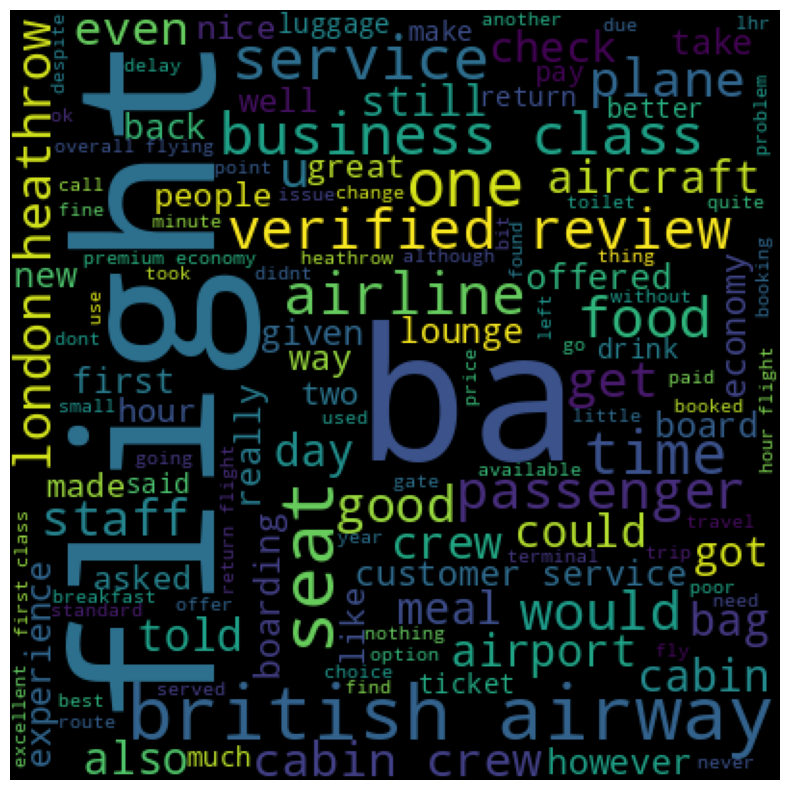

In [138]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width = 400, height = 400, 
                max_words = 500,
                stopwords = stopwords, 
                max_font_size = 100,
                min_font_size = 10).generate(' '.join(df.corpus))

plt.figure(figsize=(10, 10), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off") 


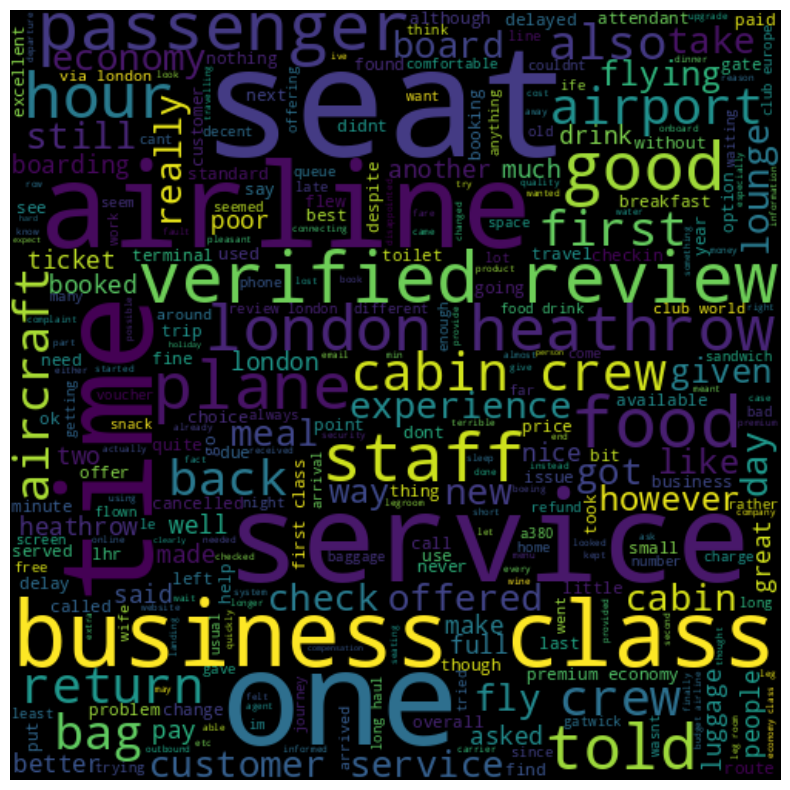

In [139]:

reviews = " ".join(df.corpus)
plt.figure(figsize=(20,10))

stopwords.update(["ba","flight", "british","airway", "could", "would","u", "get"])
# Create and generate a word cloud image:
wordcloud = WordCloud(height=500,
                      width=500,
                      max_font_size=100,
                      max_words=300, 
                      stopwords=new_stopwords
                      ).generate(reviews)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'seat'),
  Text(1, 0, 'service'),
  Text(2, 0, 'london'),
  Text(3, 0, 'time'),
  Text(4, 0, 'food'),
  Text(5, 0, 'crew'),
  Text(6, 0, 'airline'),
  Text(7, 0, 'hour'),
  Text(8, 0, 'class'),
  Text(9, 0, 'cabin'),
  Text(10, 0, 'good'),
  Text(11, 0, 'one'),
  Text(12, 0, 'heathrow'),
  Text(13, 0, 'business'),
  Text(14, 0, 'staff')])

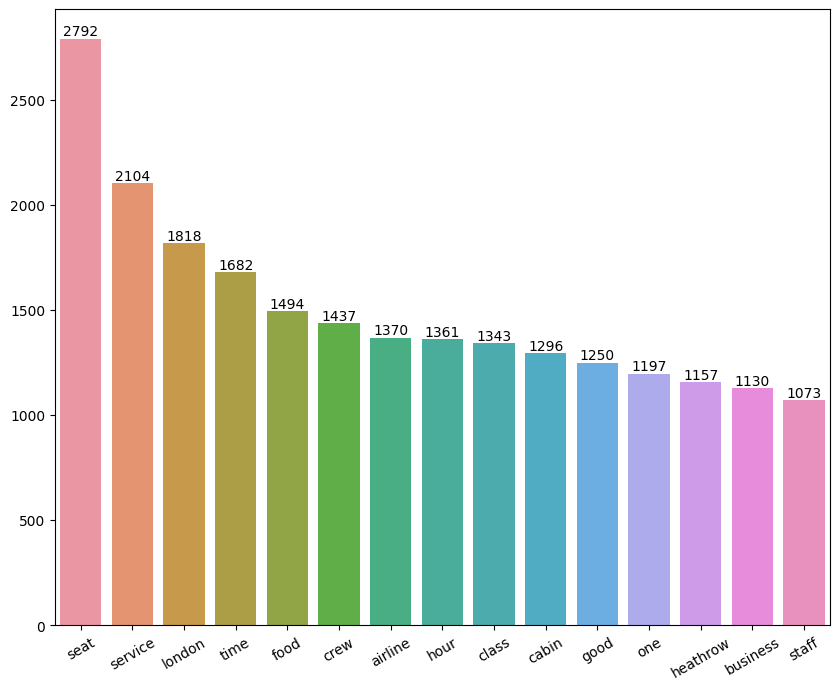

In [146]:
import seaborn as sns

words = reviews.split(" ")

new_words = [word for word in words if word not in stopwords]


nlp_words=FreqDist(new_words).most_common(15)

#create a dataframe of these word and its frequencies
all_fdist = pd.Series(dict(nlp_words))
#Setting figure, ax into variables
fig, ax = plt.subplots(figsize=(10,8))

# Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
all_plot.bar_label(all_plot.containers[0])
plt.xticks(rotation=30)

<Axes: >

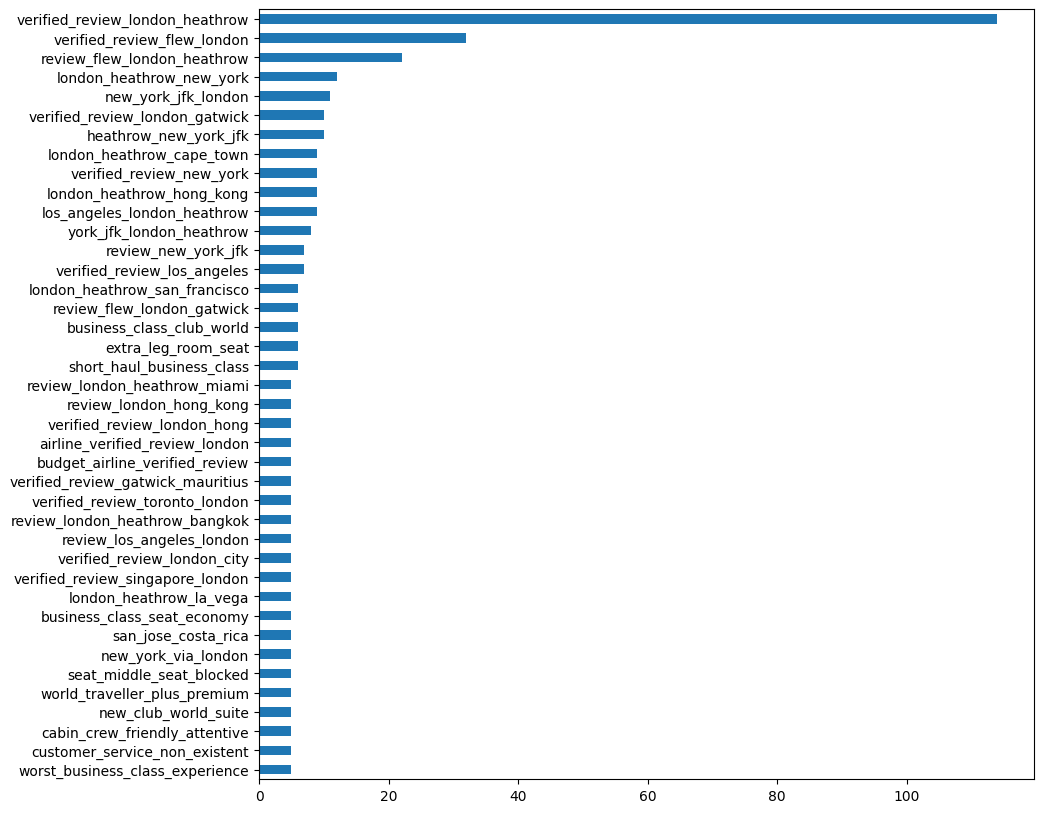

In [140]:
import nltk.collocations as collocations
from nltk import FreqDist, bigrams

reviews = " ".join(df.corpus)

#split the text of all reviews into a list of words
words = reviews.split(" ")

new_words = [word for word in words if word not in stopwords]

def get_freq_dist(new_words,number_of_ngrams ):
    from nltk import ngrams
    
    ## Generate bigrams
    ngrams = ngrams(new_words, number_of_ngrams)

    ## Creating FreqDist
    ngram_fd = FreqDist(ngrams).most_common(40)

    ## Sort values by highest frequency
    ngram_sorted = {k:v for k,v in sorted(ngram_fd, key=lambda item:item[1])}

    ## Join bigram tokens with '_' + maintain sorting
    ngram_joined = {'_'.join(k):v for k,v in sorted(ngram_fd, key=lambda item:item[1])}

    ## Convert to Pandas series for easy plotting
    ngram_freqdist = pd.Series(ngram_joined)
    plt.figure(figsize=(10,10))
    ax = ngram_freqdist.plot(kind="barh")
    
    return ax


get_freq_dist(new_words,4)